<a href="https://colab.research.google.com/github/BhavyaBansal49/Fantasy-Premier-League/blob/main/Fantasy_Premier_League_2021_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Access the API with Requests

In [1]:
import requests
import pandas as pd
import numpy as np 

In [2]:
pd.options.display.max_columns=None

In [3]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [4]:
r = requests.get(url)

In [5]:
json = r.json()

In [6]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

# Build a DataFrame from your API request response

In [7]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [8]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,NaN,NaN,80201,0,0,-1,1,0,1,2.3,0.8,1,Bernd,1.3,1,False,,None,49,80201.jpg,1.3,Leno,1.8,False,None,a,1,3,4,22616,14825,63663,15497,0.3,0.8,Leno,270,0,0,0,9,0,0,0,0,0,9,0,48,79.0,0.0,0.0,7.9,41,6,487,50,459,48,161,7,NaN,,NaN,,NaN,
1,0.0,100.0,115918,0,0,0,0,0,1,0.0,-0.5,0,Rúnar Alex,0.0,2,False,Joined OH Leuven on a season-long loan - Expec...,2021-08-31T22:00:09.069158Z,40,115918.jpg,0.0,Rúnarsson,1.3,False,None,u,1,3,0,19017,8732,23139,10965,0.0,0.0,Rúnarsson,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,353,33,342,16,287,13,363,33,NaN,,NaN,,NaN,
2,0.0,50.0,47431,0,0,-2,2,0,3,0.0,-0.2,0,Willian,0.0,3,False,Transferred to Corinthians,2021-08-20T09:30:14.065783Z,63,47431.jpg,0.0,Borges Da Silva,0.1,False,None,u,1,3,0,914,50,16454,2504,0.0,0.0,Willian,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,582,238,582,239,579,238,583,239,NaN,,NaN,,NaN,
3,100.0,100.0,54694,0,0,-1,1,0,4,1.7,0.2,1,Pierre-Emerick,0.7,4,False,,2021-08-13T14:30:14.477664Z,99,54694.jpg,1.0,Aubameyang,1.4,False,None,a,1,3,2,37133,24310,147305,17370,0.1,0.2,Aubameyang,87,0,0,0,4,0,0,0,0,0,0,0,5,5.0,2.7,19.0,2.6,286,31,253,35,144,31,271,34,NaN,,NaN,,1.0,
4,NaN,NaN,58822,0,0,-1,1,0,2,1.0,-0.5,-1,Cédric,0.0,5,False,,None,44,58822.jpg,0.0,Soares,0.2,False,None,a,1,3,0,4743,2663,9190,3094,0.0,0.0,Cédric,180,0,0,0,7,0,0,0,1,0,0,0,16,21.4,21.8,0.0,4.3,202,84,143,35,323,121,227,80,NaN,,5.0,,NaN,


In [9]:
slim_elements_df = elements_df[['second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points']]

In [10]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points
0,Leno,1,1,1.8,49,270,22616,0.8,4
1,Rúnarsson,1,1,1.3,40,0,19017,0.0,0
2,Borges Da Silva,1,3,0.1,63,0,914,0.0,0
3,Aubameyang,1,4,1.4,99,87,37133,0.2,2
4,Soares,1,2,0.2,44,180,4743,0.0,0


# Working with the DataFrame

## Using map()

The first thing I’m going to do is map the position name from the elements_type_df to the slim_elements_df . If you’ve ever used Excel, you’ll notice that map() is very similar to a v-lookup.

In [11]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
slim_elements_df.head()

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position
0,Leno,Arsenal,1,1.8,49,270,22616,0.8,4,Goalkeeper
1,Rúnarsson,Arsenal,1,1.3,40,0,19017,0.0,0,Goalkeeper
2,Borges Da Silva,Arsenal,3,0.1,63,0,914,0.0,0,Midfielder
3,Aubameyang,Arsenal,4,1.4,99,87,37133,0.2,2,Forward
4,Soares,Arsenal,2,0.2,44,180,4743,0.0,0,Defender


## Using astype()

In [14]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Using sort_values()

In [15]:
slim_elements_df.sort_values('value', ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
543,Antonio,West Ham,4,49.7,79,268,2030563,5.1,40,Forward,5.1
67,Jansson,Brentford,2,5.0,46,270,329984,4.8,22,Defender,4.8
469,Lloris,Spurs,1,10.2,56,270,414089,4.8,27,Goalkeeper,4.8
476,Dier,Spurs,2,7.3,46,270,449847,4.3,20,Defender,4.3
328,Tsimikas,Liverpool,2,24.6,42,184,857471,4.3,18,Defender,4.3
482,Sánchez,Spurs,2,2.5,45,270,184193,4.2,19,Defender,4.2
485,Reguilón,Spurs,2,11.3,52,270,654998,4.2,22,Defender,4.2
82,Pinnock,Brentford,2,5.8,46,270,378499,4.1,19,Defender,4.1
549,Benrahma,West Ham,3,30.1,64,264,1844220,4.1,26,Midfielder,4.1
99,Duffy,Brighton,2,14.7,42,270,905744,4.0,17,Defender,4.0


## Using pivot_table()

In [16]:
pivot = slim_elements_df.pivot_table(index='position', values='value', aggfunc=np.mean).reset_index()

pivot.sort_values('value', ascending=False)

,position,value
0,Defender,0.796535
3,Midfielder,0.742213
1,Forward,0.626829
2,Goalkeeper,0.625000


## Using .loc[]
.loc lets you locate specific rows that have specific column values. It’s like filtering a spreadsheet on a specific value in a column.
let’s remove all the players from our dataframe that have zero minutes this season.

In [17]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [18]:
pivot = slim_elements_df.pivot_table(index='position', values='value', aggfunc=np.mean).reset_index()

pivot.sort_values('value', ascending=False)

,position,value
2,Goalkeeper,2.000000
0,Defender,1.453153
3,Midfielder,1.097576
1,Forward,1.048980


In [19]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()

team_pivot.sort_values('value', ascending=False)

,team,value
16,Spurs,1.976471
2,Brentford,1.761111
5,Chelsea,1.711111
7,Everton,1.558824
18,West Ham,1.556250
11,Man City,1.547368
10,Liverpool,1.538889
12,Man Utd,1.525000
6,Crystal Palace,1.453333
3,Brighton,1.366667


## Using .hist()

In [20]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

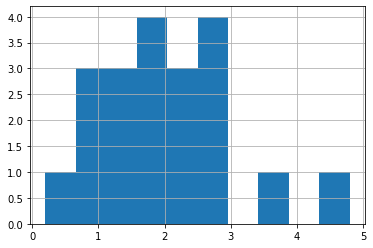

In [21]:
goal_df.value.hist()

In [22]:
goal_df.sort_values('value', ascending=False).head(10)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
469,Lloris,Spurs,1,10.2,56,270,414089,4.8,27,Goalkeeper,4.8
71,Raya Martin,Brentford,1,8.2,46,270,451292,3.7,17,Goalkeeper,3.7
314,Ramses Becker,Liverpool,1,7.2,60,270,102867,2.8,17,Goalkeeper,2.8
180,Mendy,Chelsea,1,11.1,60,270,135942,2.8,17,Goalkeeper,2.8
187,Guaita,Crystal Palace,1,5.4,45,270,90593,2.7,12,Goalkeeper,2.7
247,Schmeichel,Leicester,1,19.5,50,270,319271,2.6,13,Goalkeeper,2.6
359,de Gea,Man Utd,1,4.7,50,270,166573,2.4,12,Goalkeeper,2.4
343,Santana de Moraes,Man City,1,10.3,60,270,107289,2.3,14,Goalkeeper,2.3
111,Sánchez,Brighton,1,24.3,45,270,291533,2.2,10,Goalkeeper,2.2
409,Woodman,Newcastle,1,0.7,45,270,34039,2.0,9,Goalkeeper,2.0


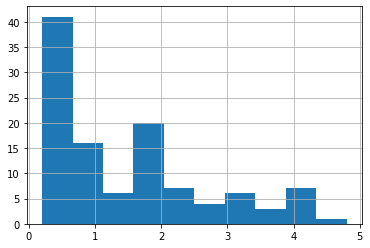

In [23]:
def_df.value.hist()

In [24]:
def_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
67,Jansson,Brentford,2,5.0,46,270,329984,4.8,22,Defender,4.8
328,Tsimikas,Liverpool,2,24.6,42,184,857471,4.3,18,Defender,4.3
476,Dier,Spurs,2,7.3,46,270,449847,4.3,20,Defender,4.3
485,Reguilón,Spurs,2,11.3,52,270,654998,4.2,22,Defender,4.2
482,Sánchez,Spurs,2,2.5,45,270,184193,4.2,19,Defender,4.2
82,Pinnock,Brentford,2,5.8,46,270,378499,4.1,19,Defender,4.1
99,Duffy,Brighton,2,14.7,42,270,905744,4.0,17,Defender,4.0
160,Alonso,Chelsea,2,12.5,57,265,708280,4.0,23,Defender,4.0
486,Tanganga,Spurs,2,3.7,45,262,287596,3.8,17,Defender,3.8
345,Laporte,Man City,2,4.5,55,180,228091,3.6,20,Defender,3.6


In [25]:
mid_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
549,Benrahma,West Ham,3,30.1,64,264,1844220,4.1,26,Midfielder,4.1
376,Greenwood,Man Utd,3,16.0,77,269,788029,3.4,26,Midfielder,3.4
237,Gray,Everton,3,6.1,56,244,491149,3.4,19,Midfielder,3.4
553,Fornals,West Ham,3,2.3,60,266,164919,3.3,20,Midfielder,3.3
186,Gallagher,Crystal Palace,3,0.9,55,180,71791,3.3,18,Midfielder,3.3
353,Torres,Man City,3,9.6,71,240,661323,3.2,23,Midfielder,3.2
361,Pogba,Man Utd,3,18.8,77,254,1097915,2.9,22,Midfielder,2.9
72,Canós,Brentford,3,3.2,55,270,253461,2.9,16,Midfielder,2.9
226,Doucouré,Everton,3,1.7,55,270,117508,2.7,15,Midfielder,2.7
224,Marques Loureiro,Everton,3,4.6,45,270,296585,2.7,12,Midfielder,2.7


In [26]:
fwd_df.sort_values('value',ascending=False).head(20)

,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,position,value
543,Antonio,West Ham,4,49.7,79,268,2030563,5.1,40,Forward,5.1
526,Dennis,Watford,4,8.1,52,245,726995,2.9,15,Forward,2.9
349,de Jesus,Man City,4,6.5,86,170,326888,2.8,24,Forward,2.8
230,Calvert-Lewin,Everton,4,15.2,82,248,691936,2.8,23,Forward,2.8
61,Ings,Aston Villa,4,33.2,80,270,597109,2.4,19,Forward,2.4
465,Armstrong,Southampton,4,3.5,60,270,278560,2.2,13,Forward,2.2
402,Saint-Maximin,Newcastle,4,5.1,65,270,204306,2.2,14,Forward,2.2
391,Wilson,Newcastle,4,5.0,75,242,104022,2.1,16,Forward,2.1
106,Maupay,Brighton,4,2.2,65,225,109216,2.0,13,Forward,2.0
415,Pukki,Norwich,4,5.3,59,224,116300,1.9,11,Forward,1.9
